# **Task 1:Load and preprocess the dataset**<br>
*	Import the required libraries (NumPy and Matplotlib)
*	Load the dataset (linearly separable) using the load_data() method
*	Normalize the dataset by dividing the pixel values by 255
*	Split the dataset into training and test sets using train_test_split() method.




In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**# Task 2:Visualize the dataset**
*	Visualize some random images from the dataset using Matplotlib's imshow() method

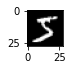

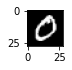

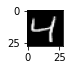

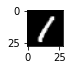

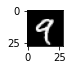

In [ ]:
from matplotlib import pyplot
for i in range(5):  
  pyplot.subplot(380 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()


# **Task 3: Implement the Simple Perceptron model**

*	Define the Simple Perceptron model with a single layer of output nodes and no hidden layers
* Implement the forward propagation algorithm to compute the output of the model
* Implement the backward propagation algorithm to update the weights and bias term of the model
* For weight update, use the formula given below:<br>
w_i = w_i + Δw_i <br>
where Δw_i = η (t - o) x_i


Where:
-	t is actual value
-	o is perceptron output
-	η is small constant (0.001) called learning rate



# **Task 4: Train the Simple Perceptron model**
* Set the number of epochs and the learning rate for the training process
* Iterate over the training examples and adjust the weights and bias term using the above equation <br>



# **Task 5: Evaluate the performance of the Simple Perceptron model on the test set**
* Compute the accuracy of the Simple Perceptron model on the test set

In [55]:
import numpy as np

class SimpleBinaryPerceptron:
        
        #Initialize the CustomPerceptron model with the number of iterations, 
        #random state for initializing weights, and the learning rate to update 
        #the weights during training.
        
    def __init__(self, max_iterations=100, random_state=32, learning_rate=0.01):
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.learning_rate = learning_rate
      
        
    def fit(self, X, y):
      
        #Fit the CustomPerceptron model to the training data X and corresponding target labels y.
        

        # Initialize random weights
        rgen = np.random.RandomState(self.random_state)
        self.weights_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

         # Track errors for each iteration
        self.errors_ = []
         # Train the model for the specified number of iterations
        for _ in range(self.max_iterations):
            num_errors = 0
            
            
             # Update weights for each training example
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights_[1:] += update * xi
                self.weights_[0] += update
                num_errors += int(update != 0.0)
            # Record the number of errors for the current iteration
            self.errors_.append(num_errors)
                
        return self
    
    def net_input(self, X):
      
        #Calculate the weighted sum of inputs.
      
        return np.dot(X, self.weights_[1:]) + self.weights_[0]
    
    def predict(self, X):
        
        #Make predictions based on the sign of the net input.
        
        return np.where(self.net_input(X) >= 0, 1, 0)
    
    def score(self, X, y):
      
        #Calculate the accuracy of the model on the input data X and corresponding target labels y.
        
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy


In [58]:
model = SimpleBinaryPerceptron(max_iterations=10)
# Fit the model
model.fit(X_train, y_train)

# Score the model on the test and train sets
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

print("Test set score:", test_score)
print("Train set score:", train_score)

Test set score: 0.1135
Train set score: 0.11236666666666667


# **Task 6: Analysis on the results**
* Are the accuracy scores satisfactory or not? If not, what measures can be taken to improve the accuracy scores? Please express your ideas in your own words.


In [68]:
print(f"Test Accuracy Percentage: {test_score * 100 } %")
print(f"Train Accuracy Percentage: {round(train_score * 100 , 2) } %")

Test Accuracy Percentage: 11.35 %
Train Accuracy Percentage: 11.24 %


The accuracy score is not satisfactoty since it is very low. The reason being that it is a simple binary implementation of perceptron and it classifies the digits accordingly. So weights are updated more frequently. <br>
The accuracy can be improved by using batch processing, using optimizer such as 'adam' and being implemented in such a way to give more than two classification not just binary classification.

